Edge Detection(reverse colour)

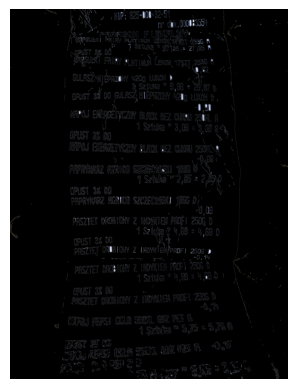

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur to reduce noise and enhance edges
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    
    # Apply Canny edge detection to find edges in the image
    edges = cv2.Canny(blurred_image, threshold1=20, threshold2=60)
    
    # Find contours in the edge-detected image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Create a mask to keep only the areas with detected edges
    mask = np.zeros_like(gray_image)
    for contour in contours:
        cv2.drawContours(mask, [contour], -1, (255), thickness=cv2.FILLED)
    
    # Apply the mask to the original image
    preprocessed_image = cv2.bitwise_and(image, image, mask=mask)
    
    return preprocessed_image

def main():
    image_path = 'DataSet/train/2.jpg'
    
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)
    
    # Show the preprocessed image using matplotlib
    plt.imshow(cv2.cvtColor(preprocessed_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    main()


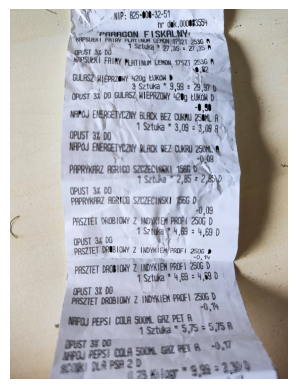

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur to reduce noise and enhance edges
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    
    # Apply Canny edge detection to find edges in the image
    edges = cv2.Canny(blurred_image, threshold1=20, threshold2=60)
    
    # Find contours in the edge-detected image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Create a mask to keep only the areas with detected edges
    mask = np.zeros_like(gray_image)
    for contour in contours:
        cv2.drawContours(mask, [contour], -1, (255), thickness=cv2.FILLED)
    
    # Invert the mask to keep areas inside the detected edges
    mask = 255 - mask
    
    # Apply the mask to the original image
    preprocessed_image = cv2.bitwise_and(image, image, mask=mask)
    
    return preprocessed_image

def main():
    image_path = 'DataSet/train/2.jpg'
    
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)
    
    # Show the preprocessed image using matplotlib
    plt.imshow(cv2.cvtColor(preprocessed_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    main()


Gausian + Adaptive Threshold

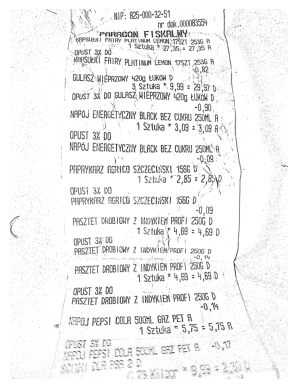

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def perform_gaussian_binarization(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Gaussian blur
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

    # Apply Gaussian adaptive thresholding
    binarized_image = cv2.adaptiveThreshold(
        blurred_image,
        255,  # Output value for pixels above the threshold
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY,
        13,    # Block size for local thresholding
        3     # Constant subtracted from the mean
    )

    return binarized_image

def main():
    image_path = 'DataSet/train/2.jpg'

    # Perform Gaussian binarization
    binarized_image = perform_gaussian_binarization(image_path)

    # Show the binarized image using matplotlib
    plt.imshow(binarized_image, cmap='gray')
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    main()


Gausian + Adaptive + Morph Open

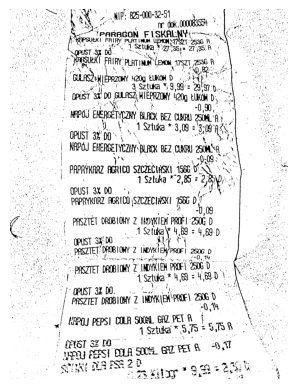

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def perform_morphological_binarization(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Gaussian blur
    blurred_image = cv2.GaussianBlur(image, (11, 11), 0)

    # Apply Gaussian adaptive thresholding
    binarized_image = cv2.adaptiveThreshold(
        blurred_image,
        255,  # Output value for pixels above the threshold
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY,
        15,    # Block size for local thresholding
        2     # Constant subtracted from the mean
    )

    # Apply morphological opening
    kernel = np.ones((8, 8), np.uint8)
    opened_image = cv2.morphologyEx(binarized_image, cv2.MORPH_OPEN, kernel)

    return opened_image

def main():
    image_path = 'DataSet/train/2.jpg'

    # Perform morphological binarization
    binarized_image = perform_morphological_binarization(image_path)

    # Show the binarized image using matplotlib
    plt.imshow(binarized_image, cmap='gray')
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    main()


Gausian + Adaptive + Morph Open Grid Search

In [3]:
import cv2
import numpy as np
import os

def perform_morphological_binarization(image_path, blur_size, block_size, subtract_const, kernel_size):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    blurred_image = cv2.GaussianBlur(image, (blur_size, blur_size), 0)
    binarized_image = cv2.adaptiveThreshold(
        blurred_image,
        255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY,
        block_size,
        subtract_const
    )
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    opened_image = cv2.morphologyEx(binarized_image, cv2.MORPH_OPEN, kernel)
    return opened_image

def main():
    image_path = 'DataSet/train/2.jpg'
    output_dir = 'grid_search/'
    
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    for blur_size in range(3, 14, 2):
        for block_size in range(3, 16, 2):
            for subtract_const in range(1, 7):
                for kernel_size in range(2, 11):
                    result_image = perform_morphological_binarization(
                        image_path, blur_size, block_size, subtract_const, kernel_size
                    )
                    output_name = f'{blur_size}x{block_size}x{subtract_const}x{kernel_size}.jpg'
                    output_path = os.path.join(output_dir, output_name)
                    cv2.imwrite(output_path, result_image)
                    print(f'Saved {output_name}')

if __name__ == "__main__":
    main()


Saved 3x3x1x2.jpg
Saved 3x3x1x3.jpg
Saved 3x3x1x4.jpg
Saved 3x3x1x5.jpg
Saved 3x3x1x6.jpg
Saved 3x3x1x7.jpg
Saved 3x3x1x8.jpg
Saved 3x3x1x9.jpg
Saved 3x3x1x10.jpg
Saved 3x3x2x2.jpg
Saved 3x3x2x3.jpg
Saved 3x3x2x4.jpg
Saved 3x3x2x5.jpg
Saved 3x3x2x6.jpg
Saved 3x3x2x7.jpg
Saved 3x3x2x8.jpg
Saved 3x3x2x9.jpg
Saved 3x3x2x10.jpg
Saved 3x3x3x2.jpg
Saved 3x3x3x3.jpg
Saved 3x3x3x4.jpg
Saved 3x3x3x5.jpg
Saved 3x3x3x6.jpg
Saved 3x3x3x7.jpg
Saved 3x3x3x8.jpg
Saved 3x3x3x9.jpg
Saved 3x3x3x10.jpg
Saved 3x3x4x2.jpg
Saved 3x3x4x3.jpg
Saved 3x3x4x4.jpg
Saved 3x3x4x5.jpg
Saved 3x3x4x6.jpg
Saved 3x3x4x7.jpg
Saved 3x3x4x8.jpg
Saved 3x3x4x9.jpg
Saved 3x3x4x10.jpg
Saved 3x3x5x2.jpg
Saved 3x3x5x3.jpg
Saved 3x3x5x4.jpg
Saved 3x3x5x5.jpg
Saved 3x3x5x6.jpg
Saved 3x3x5x7.jpg
Saved 3x3x5x8.jpg
Saved 3x3x5x9.jpg
Saved 3x3x5x10.jpg
Saved 3x3x6x2.jpg
Saved 3x3x6x3.jpg
Saved 3x3x6x4.jpg
Saved 3x3x6x5.jpg
Saved 3x3x6x6.jpg
Saved 3x3x6x7.jpg
Saved 3x3x6x8.jpg
Saved 3x3x6x9.jpg
Saved 3x3x6x10.jpg
Saved 3x5x1x2.jpg
Save

Edges for grid search

In [4]:
import cv2
import os

def apply_edge_detection(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(image, threshold1=20, threshold2=60)
    return edges

def main():
    input_dir = '/grid_search/'
    output_dir = '/grid_search_edges/'

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    image_files = [f for f in os.listdir(input_dir) if f.endswith('.jpg')]

    for image_file in image_files:
        image_path = os.path.join(input_dir, image_file)
        edges_image = apply_edge_detection(image_path)
        output_path = os.path.join(output_dir, image_file)
        cv2.imwrite(output_path, edges_image)
        print(f'Edge detection applied to {image_file} and saved as {output_path}')

if __name__ == "__main__":
    main()


Edge detection applied to 11x11x1x3.jpg and saved as C:/Users/tompys/Documents/Projekt/grid_search_edges/11x11x1x3.jpg
Edge detection applied to 11x11x1x4.jpg and saved as C:/Users/tompys/Documents/Projekt/grid_search_edges/11x11x1x4.jpg
Edge detection applied to 11x11x1x5.jpg and saved as C:/Users/tompys/Documents/Projekt/grid_search_edges/11x11x1x5.jpg
Edge detection applied to 11x13x1x4.jpg and saved as C:/Users/tompys/Documents/Projekt/grid_search_edges/11x13x1x4.jpg
Edge detection applied to 11x13x1x5.jpg and saved as C:/Users/tompys/Documents/Projekt/grid_search_edges/11x13x1x5.jpg
Edge detection applied to 11x15x1x2.jpg and saved as C:/Users/tompys/Documents/Projekt/grid_search_edges/11x15x1x2.jpg
Edge detection applied to 11x15x1x3.jpg and saved as C:/Users/tompys/Documents/Projekt/grid_search_edges/11x15x1x3.jpg
Edge detection applied to 11x15x1x4.jpg and saved as C:/Users/tompys/Documents/Projekt/grid_search_edges/11x15x1x4.jpg
Edge detection applied to 11x15x1x5.jpg and save

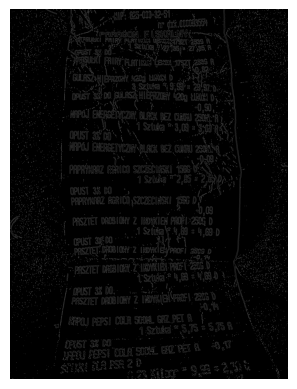

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def perform_morphological_binarization_with_edge_detection(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Gaussian blur
    blurred_image = cv2.GaussianBlur(image, (13, 13), 0)

    # Apply Gaussian adaptive thresholding
    binarized_image = cv2.adaptiveThreshold(
        blurred_image,
        255,  # Output value for pixels above the threshold
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY,
        15,    # Block size for local thresholding
        2     # Constant subtracted from the mean
    )

    # Apply morphological opening
    kernel = np.ones((7, 7), np.uint8)
    opened_image = cv2.morphologyEx(binarized_image, cv2.MORPH_OPEN, kernel)

    # Apply Canny edge detection
    edges = cv2.Canny(opened_image, threshold1=20, threshold2=120)

    return edges

def main():
    image_path = 'DataSet/train/2.jpg'

    # Get edges from morphological binarization with edge detection
    edges = perform_morphological_binarization_with_edge_detection(image_path)

    # Show the edges using matplotlib
    plt.imshow(edges, cmap='gray')
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    main()


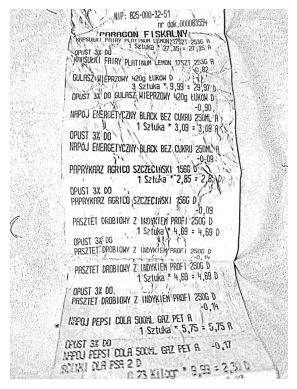

In [11]:
import cv2
import matplotlib.pyplot as plt

def perform_adaptive_binarization(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Gaussian adaptive thresholding
    binarized_image = cv2.adaptiveThreshold(
        image,
        255,  # Output value for pixels above the threshold
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY,
        37,    # Block size for local thresholding
        5      # Constant subtracted from the mean
    )

    return binarized_image

def main():
    image_path = 'DataSet/train/2.jpg'

    # Perform adaptive binarization
    binarized_image = perform_adaptive_binarization(image_path)

    # Show the binarized image using matplotlib
    plt.imshow(binarized_image, cmap='gray')
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    main()


Selecting Regions bellow certain hex value threshold

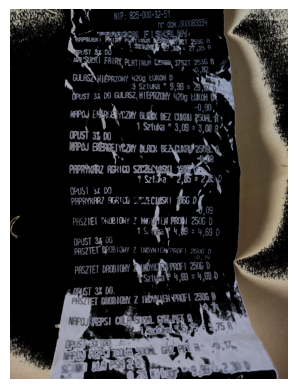

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def select_darker_regions(image_path, hex_color):
    # Load the image using OpenCV
    image = cv2.imread(image_path)
    
    # Convert hex color to BGR color format
    hex_color_bgr = np.array([int(hex_color[5:7], 16), int(hex_color[3:5], 16), int(hex_color[1:3], 16)])
    
    # Convert the hex color to the same data type as the image
    hex_color_bgr = hex_color_bgr.astype(image.dtype)
    
    # Create a mask for pixels darker than the specified color
    mask = cv2.inRange(image, np.zeros(3, dtype=np.uint8), hex_color_bgr)
    
    # Apply the mask to the original image
    selected_regions = cv2.bitwise_and(image, image, mask=mask)
    
    return selected_regions

def main():
    image_path = 'C:/Users/tompys/Documents/Projekt/DataSet/train/2.jpg'
    hex_color = '#bfbfbf'
    
    # Select darker regions
    selected_regions = select_darker_regions(image_path, hex_color)
    
    # Show the selected regions using matplotlib
    plt.imshow(cv2.cvtColor(selected_regions, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    main()


In [127]:
import cv2

def perform_hybrid_binarization(image_path, adjustment_factor):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    _, otsu_binarized = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    manual_threshold = int(otsu_binarized.max() * adjustment_factor)
    _, binarized_image = cv2.threshold(image, manual_threshold, 255, cv2.THRESH_BINARY)

    return binarized_image

# Smaller value makes the threshold stricter, larger value makes it more permissive
adjustment_factor = 0.4  # Adjust this value as needed
binarized_image = perform_hybrid_binarization('C:/Users/tompys/Documents/Projekt/Paragony/enhanced2.jpeg', adjustment_factor)
cv2.imwrite('binarized_image2.jpg', binarized_image)


True

In [62]:
import cv2

# Load the binarized image
binarized_image = cv2.imread('binarized_image.jpg', cv2.IMREAD_GRAYSCALE)

# Invert the binarized image (black becomes white, and vice versa)
inverted_image = cv2.bitwise_not(binarized_image)

# Find contours in the inverted image
contours, _ = cv2.findContours(inverted_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Print the number of detected contours before grouping
print(f"Number of Detected Contours (Before Grouping): {len(contours)}")

# Sort contours by Y-coordinate
sorted_contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[1])

# Group contours into lines
lines = []
line = []
max_vertical_distance = 3  # Adjust this value based on your image's characteristics
for contour in sorted_contours:
    x, y, w, h = cv2.boundingRect(contour)
    if not line or abs(y - cv2.boundingRect(line[-1])[1]) <= max_vertical_distance:
        line.append(contour)
    else:
        lines.append(line)
        line = [contour]
if line:
    lines.append(line)

# Calculate the overall bounding rectangle for each line
line_bounding_boxes = []
for line in lines:
    line_x = min(cv2.boundingRect(c)[0] for c in line)
    line_y = min(cv2.boundingRect(c)[1] for c in line)
    line_w = max(cv2.boundingRect(c)[0] + cv2.boundingRect(c)[2] for c in line) - line_x
    line_h = max(cv2.boundingRect(c)[1] + cv2.boundingRect(c)[3] for c in line) - line_y
    line_bounding_boxes.append((line_x, line_y, line_w, line_h))

# Draw bounding boxes on a copy of the original image
image_with_lines = cv2.cvtColor(binarized_image, cv2.COLOR_GRAY2BGR)
for rect in line_bounding_boxes:
    x, y, w, h = rect
    cv2.rectangle(image_with_lines, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Save the image with drawn lines
cv2.imwrite('image_with_lines.jpg', image_with_lines)

# Print the number of detected lines (grouped contours)
print(f"Number of Detected Lines: {len(lines)}")


Number of Detected Contours (Before Grouping): 939
Number of Detected Lines: 19


In [129]:
import cv2

# Load the binarized image
binarized_image = cv2.imread('binarized_image.jpg', cv2.IMREAD_GRAYSCALE)

# Invert the binarized image (black becomes white, and vice versa)
inverted_image = cv2.bitwise_not(binarized_image)

# Find contours in the inverted image
contours, _ = cv2.findContours(inverted_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Define conditions for detecting words
word_contours = []
min_word_height = 10  
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if h >= min_word_height:
        word_contours.append(contour)

# Sort word contours by X-coordinate
sorted_word_contours = sorted(word_contours, key=lambda c: cv2.boundingRect(c)[0])

# Group word contours into lines based on Y-coordinate proximity
lines = []
line = []
max_vertical_distance = 3  # Adjust this value based on your image's characteristics
for contour in sorted_word_contours:
    x, y, w, h = cv2.boundingRect(contour)
    if not line or abs(y - cv2.boundingRect(line[0])[1]) <= max_vertical_distance:
        line.append(contour)
    else:
        lines.append(line)
        line = [contour]
if line:
    lines.append(line)

# Calculate bounding boxes for lines of words
line_bounding_boxes = []
for line in lines:
    x_values = [cv2.boundingRect(c)[0] for c in line]
    y_values = [cv2.boundingRect(c)[1] for c in line]
    x = min(x_values)
    y = min(y_values)
    w = max(x_values) + cv2.boundingRect(line[-1])[2] - x
    h = max(y_values) + cv2.boundingRect(line[-1])[3] - y
    line_bounding_boxes.append((x, y, w, h))

# Draw bounding boxes for lines of words on a copy of the original image
image_with_lines_of_words = cv2.cvtColor(binarized_image, cv2.COLOR_GRAY2BGR)
for rect in line_bounding_boxes:
    x, y, w, h = rect
    cv2.rectangle(image_with_lines_of_words, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Save the image with drawn lines of words
cv2.imwrite('image_with_lines_of_words.jpg', image_with_lines_of_words)

# Print the number of detected lines (grouped word contours)
print(f"Number of Detected Lines (Words): {len(lines)}")


Number of Detected Lines (Words): 449


Component Analysis

In [20]:
import cv2

def perform_connected_component_analysis(binarized_image):
    # Perform connected component labeling
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binarized_image, connectivity=4)

    # Filter and process components
    min_component_size = 30  
    characters = []

    for label in range(1, num_labels):
        if stats[label, cv2.CC_STAT_AREA] >= min_component_size:
            x, y, w, h = stats[label, cv2.CC_STAT_LEFT], stats[label, cv2.CC_STAT_TOP], stats[label, cv2.CC_STAT_WIDTH], stats[label, cv2.CC_STAT_HEIGHT]
            
            # Extract the character and add it to the list
            character = binarized_image[y:y+h, x:x+w]
            characters.append(character)

    return characters

# Load binarized image
binarized_image = cv2.imread('grid_search/13x7x1x2.jpg', cv2.IMREAD_GRAYSCALE)


# Perform connected component analysis
characters = perform_connected_component_analysis(binarized_image)



In [24]:
import cv2
import numpy as np

def perform_connected_component_analysis_words(binarized_image):
    # Perform connected component labeling
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binarized_image, connectivity=4)

    # Filter and process components into words
    min_word_width = 50  
    min_word_height = 10  
    words = []

    for label in range(1, num_labels):
        x, y, w, h = stats[label, cv2.CC_STAT_LEFT], stats[label, cv2.CC_STAT_TOP], stats[label, cv2.CC_STAT_WIDTH], stats[label, cv2.CC_STAT_HEIGHT]
        
        # Adjust these thresholds as needed to group components into words
        if w >= min_word_width and h >= min_word_height:
            word = binarized_image[y:y+h, x:x+w]
            words.append(word)

    return words

# Load your binarized image
binarized_image = cv2.imread('binarized_image.jpg', cv2.IMREAD_GRAYSCALE)

# Perform connected component analysis for words
words = perform_connected_component_analysis_words(binarized_image)

# Now 'words' contains individual word images


OCR Test

In [29]:
import pytesseract
enhanced_receipt='grid_search/test4.jpg'
text = pytesseract.image_to_string(enhanced_receipt, config="--oem 3 --psm 6 -l pol")
print(text)

KQPSUŁKI FATRY PLATINUM; UEMON41787T: 536 A

